<!-- @format -->

# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.


In [460]:
# Relevant imports
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

<!-- @format -->

## 1. Maximization of Functions using Gradient Descent


<!-- @format -->

**Task**:

- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


<!-- @format -->

### a) $f(x) = -x^4 + 4x^2 - 2x + 1$


In [ ]:
def f(x):
    return -(x**4) + 4 * x**2 - 2 * x + 1

In [ ]:
# Początkowa wartość x
x = torch.tensor(
    0.0, requires_grad=True
)  # Musi mieć 'requires_grad', żeby PyTorch liczył gradienty

# Learning rate i liczba iteracji
learning_rate = 0.01
epochs = 100

In [ ]:
# Listy do zapisywania wyników do wizualizacji
x_values = []
f_values = []

# Gradient ascent: aktualizujemy x iteracyjnie
for i in range(epochs):
    # Oblicz wartość funkcji
    loss = f(x)

    # Dodaj wyniki do list
    x_values.append(x.item())
    f_values.append(loss.item())

    loss.backward()

    # Aktualizuj x zgodnie z gradient ascent
    with torch.no_grad():  # Wyłączamy śledzenie, żeby PyTorch nie zapamiętywał tego kroku
        x += learning_rate * x.grad  # Poprawnie: używamy .grad bez nawiasów
        x.grad.zero_()  # Poprawnie: zerujemy gradienty

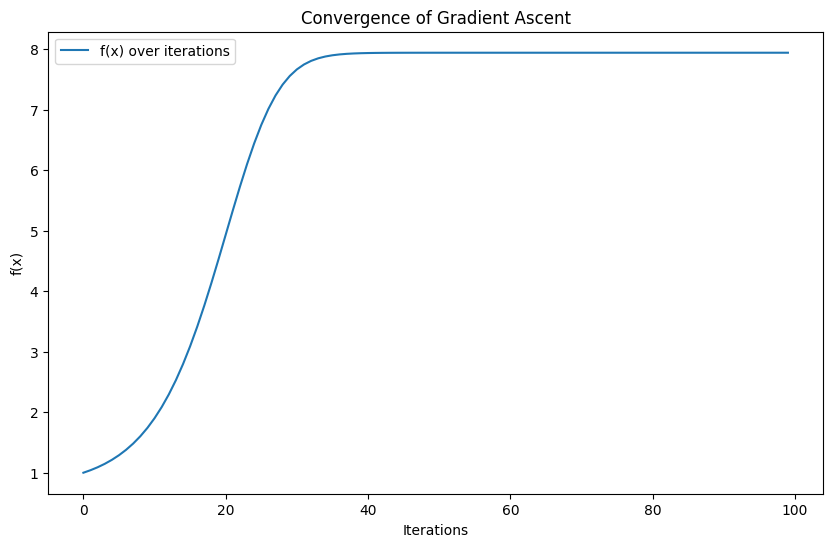

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(f_values, label="f(x) over iterations")
plt.xlabel("Iterations")
plt.ylabel("f(x)")
plt.title("Convergence of Gradient Ascent")
plt.legend()
plt.show()

<!-- @format -->

### b) $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$


In [687]:
val = lambda: torch.randn(1)
args = torch.tensor((val(), val(), val()), requires_grad=True)
# args = torch.tensor((0.0, 0.0, 0.0), requires_grad=True)
# args = torch.tensor(torch.randn(3), requires_grad=True)

learning_rate = 0.01
epochs = 100

In [688]:
def f(x, y, z):
    return -(x**2) - y**2 - x**2 + 2 * x * y - y * z + 3 * z

In [689]:
x_values = []
y_values = []
z_values = []

for i in range(epochs):
    loss = f(*args)

    loss.backward()

    x_values.append(args[0].item())
    y_values.append(args[1].item())
    z_values.append(args[2].item())

    with torch.no_grad():
        args += learning_rate * args.grad
        args.grad.zero_()

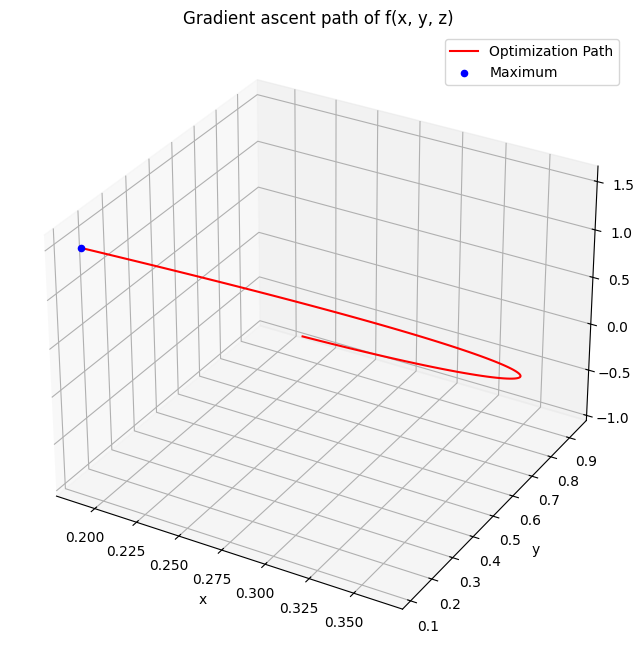

In [690]:
plt.figure(figsize=(8, 8))

ax = plt.axes(projection="3d")

ax.set_title("Gradient ascent path of f(x, y, z)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Ścieżka optymalizacji
ax.plot3D(x_values, y_values, z_values, "red", label="Optimization Path")

# Punkt końcowy (maksimum)
ax.scatter(x_values[-1], y_values[-1], z_values[-1], color="blue", label="Maximum")
plt.legend()

<!-- @format -->

## 2. Linear Regression in PyTorch


<!-- @format -->

**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [738]:
# This allow us to save same pseudo-random sequence
np.random.seed(0) 
# generate 100 random numbers from unform distribution between -10 and 10
X = np.random.uniform(-10, 10, 100) 
# Random noise, generate 100 random numbers from normal distribution between 0 and 0.1
epsilon = np.random.normal(0, 0.1, 100)  
y = 3 * X + 4 + epsilon

In [739]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [740]:
# Defining a class
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # define dirfferent layers
        self.linear = nn.Linear(1,1)

    # applying the layers
    def forward(self, x):
        return self.linear(x)

In [865]:
# Training
def train_with_opt(model, x_train, y_train, optimizer, epochs = 100, loss = nn.MSELoss()):
    losses = []
    for epoch in range(epochs):
        # predict = forward pass with our model
        labels = model(x_train)
        
        # calculate loss
        l = loss(y_train, labels)
        # calculate gradients = backward pass
        l.backward()
        
        # update weights
        optimizer.step()
        # zero the gradients after updating
        optimizer.zero_grad()
        
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {l.item():.4f}')
        losses.append(l.item())
    return losses

In [ ]:
model = LinearRegression().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)


In [ ]:
losses = train_with_opt(model, X_tensor, y_tensor, optimizer, epochs=1000)

Epoch [100/1000], Loss: 16.2345
Epoch [200/1000], Loss: 10.9208
Epoch [300/1000], Loss: 7.3475
Epoch [400/1000], Loss: 4.9444
Epoch [500/1000], Loss: 3.3284
Epoch [600/1000], Loss: 2.2416
Epoch [700/1000], Loss: 1.5107
Epoch [800/1000], Loss: 1.0192
Epoch [900/1000], Loss: 0.6887
Epoch [1000/1000], Loss: 0.4664


Learned parameters: Weight = 2.9883639812469482, Bias = 3.341798782348633


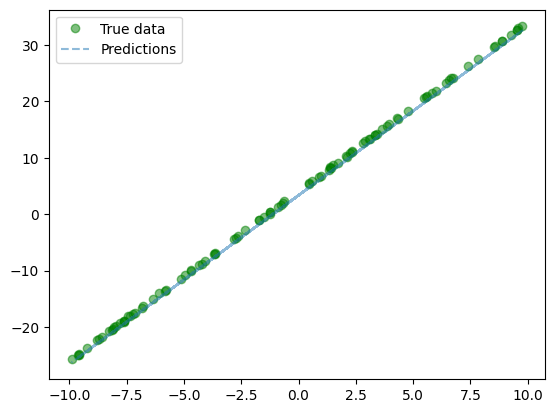

In [ ]:
# Plotting
with torch.no_grad():
    predicted = model(X_tensor.to(device)).cpu().numpy()
x_train_cp, y_train_cp = X_tensor.cpu().numpy(), y_tensor.cpu().numpy()

plt.plot(x_train_cp, y_train_cp, "go", label="True data", alpha=0.5)
plt.plot(x_train_cp, predicted, "--", label="Predictions", alpha=0.5)
plt.legend(loc="best")
print(
    f"Learned parameters: Weight = {model.linear.weight.item()}, Bias = {model.linear.bias.item()}"
)

<!-- @format -->

**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


<!-- @format -->

## 3. Learning Rate Analysis


<!-- @format -->

**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


Epoch [100/100], Loss: 99.5976
Epoch [100/100], Loss: 0.1942
Epoch [100/100], Loss: nan
Epoch [100/100], Loss: nan


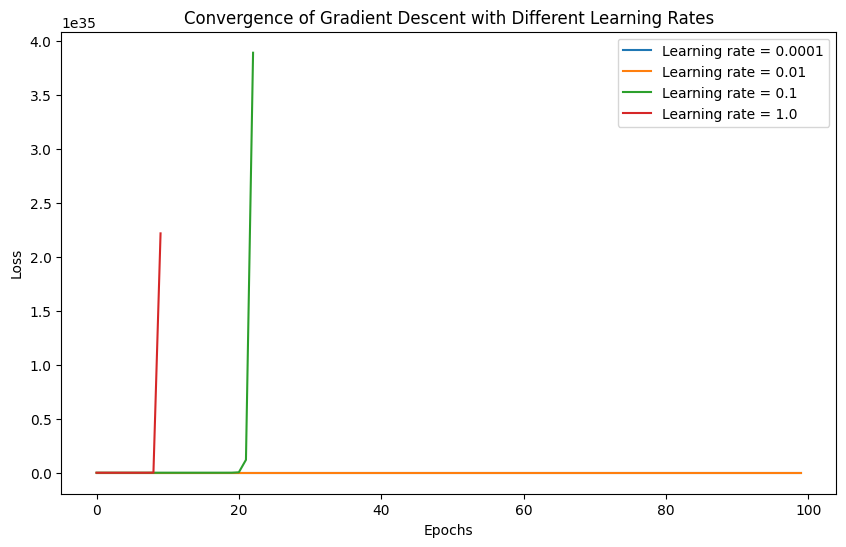

In [ ]:
def plot_loss_curves(learning_rates):
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        model = LinearRegression().to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)

        losses = train_with_opt(model, X_tensor, y_tensor, optimizer)
        
        plt.plot(losses, label=f'Learning rate = {lr}')
        
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Convergence of Gradient Descent with Different Learning Rates')
    plt.show()

learning_rates = [0.0001, 0.01, 0.1, 1.0]
plot_loss_curves(learning_rates)

<!-- @format -->

## 4. Polynomial Regression Extension


<!-- @format -->

**Dataset**: Use the following code to create a dataset of 100 samples:


In [888]:
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon



In [889]:
class PolynomialRegressionModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        # define dirfferent layers
        self.linear = nn.Linear(in_dim, out_dim)

    # applying the layers
    def forward(self, x):
        return self.linear(x)

epochs = 20

X_poly = np.vstack((X, X**2, X**3)).T
X_poly_tensor = torch.tensor(X_poly, dtype=torch.float32).to(device)
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)

In [890]:
def train_for_poly(model, optimizer, epochs, loss=nn.MSELoss()):
    losses = []
    for epoch in range(epochs):
        labels = model(X_poly_tensor if model.linear.in_features > 1 else X_tensor.view(-1, 1))
        
        l = loss(y_tensor, labels)
        
        l.backward()
        
        optimizer.step()
        
        optimizer.zero_grad()
        if (epoch + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {l.item():.4f}")
        losses.append(l.item())
    return losses

In [891]:
# Train both models and compare
print("\nTraining Linear Regression...")
linear_model = LinearRegression().to(device)
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)
linear_losses = train_for_poly(linear_model, optimizer, epochs)

print("\nTraining Polynomial Regression...")
poly_model = PolynomialRegressionModel(3, 1).to(device)
optimizer = torch.optim.SGD(poly_model.parameters(), lr=0.0001)
poly_losses = train_for_poly(poly_model, optimizer, epochs)


Training Linear Regression...

Training Polynomial Regression...


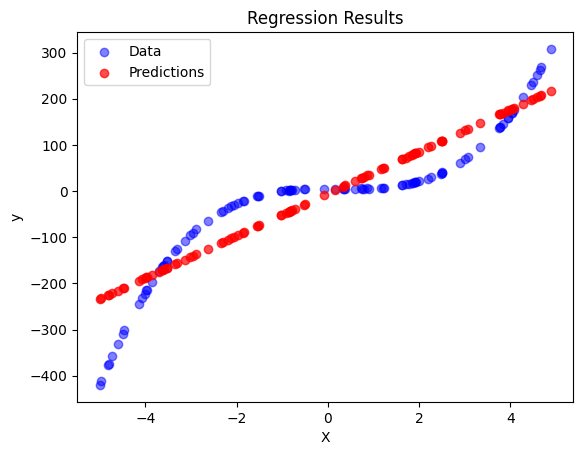

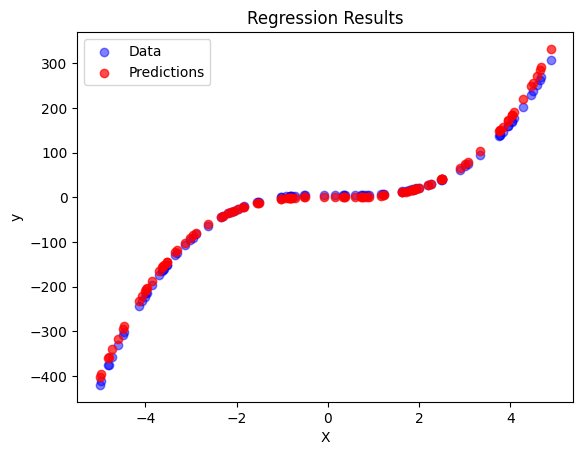

Text(0.5, 1.0, 'Loss Curves')

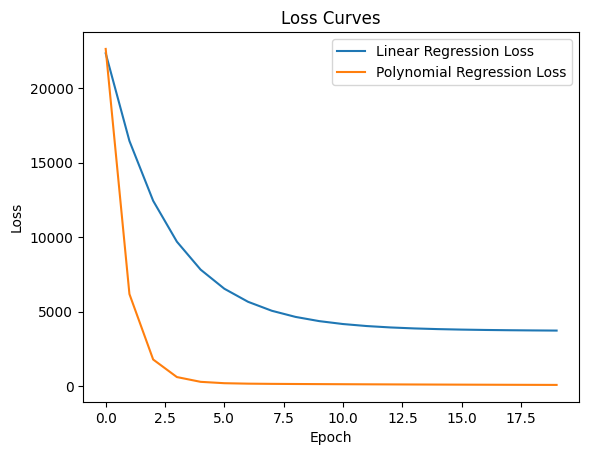

In [892]:
def plot_results(model, X, y, is_poly=True):
    model.eval()
    with torch.no_grad():
        if is_poly:
            y_pred = model(X_poly_tensor)
        else:
            y_pred = model(X_tensor.view(-1, 1))

    plt.scatter(X, y, label="Data", color="blue", alpha=0.5)
    plt.scatter(X, y_pred.cpu().numpy(), label="Predictions", color="red", alpha=0.7)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title("Regression Results")
    plt.show()

# plot results
plot_results(linear_model, X, y, is_poly=False)
plot_results(poly_model, X, y, is_poly=True)

# loss curves
plt.plot(linear_losses, label="Linear Regression Loss")
plt.plot(poly_losses, label="Polynomial Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves")

<!-- @format -->

**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


<!-- @format -->

## 5. Overfitting and Regularization


<!-- @format -->

**Dataset**: Use the following code to generate a dataset with 150 samples:


In [893]:
np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon
# Nie inicjalizujemy zerami oraz wartościami stałymi

<!-- @format -->

**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


<!-- @format -->

## 6. Custom Gradient Descent in PyTorch


<!-- @format -->

**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


In [894]:
np.random.seed(0) 
X = np.random.uniform(-10, 10, 100)  
epsilon = np.random.normal(0, 0.1, 100) 
y = 3 * X + 4 + epsilon

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)

In [895]:
def custom_train(model, learning_rate, X_tensor, y_tensor, epochs=100, loss=nn.MSELoss()):
    losses = []
    for epoch in range(epochs):
        labels = model(X_tensor)

        l = loss(y_tensor, labels)

        l.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        model.zero_grad()
        
        if (epoch + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {l.item():.4f}")
        losses.append(l.item())
    return losses

In [896]:
custom_model = LinearRegression().to(device)
learning_rate = 0.01
epochs = 1000

In [897]:
custom_losses = custom_train(
    custom_model,
    learning_rate,
    X_tensor,
    y_tensor,
    epochs,
    )

losses = train_with_opt(custom_model, X_tensor, y_tensor, optimizer, epochs)

Epoch [100/1000], Loss: 0.4626
Epoch [200/1000], Loss: 0.0182
Epoch [300/1000], Loss: 0.0101
Epoch [400/1000], Loss: 0.0099
Epoch [500/1000], Loss: 0.0099
Epoch [600/1000], Loss: 0.0099
Epoch [700/1000], Loss: 0.0099
Epoch [800/1000], Loss: 0.0099
Epoch [900/1000], Loss: 0.0099
Epoch [1000/1000], Loss: 0.0099
Epoch [100/1000], Loss: 0.0099
Epoch [200/1000], Loss: 0.0099
Epoch [300/1000], Loss: 0.0099
Epoch [400/1000], Loss: 0.0099
Epoch [500/1000], Loss: 0.0099
Epoch [600/1000], Loss: 0.0099
Epoch [700/1000], Loss: 0.0099
Epoch [800/1000], Loss: 0.0099
Epoch [900/1000], Loss: 0.0099
Epoch [1000/1000], Loss: 0.0099


Text(0.5, 1.0, 'Training Loss using Custom Gradient Decent')

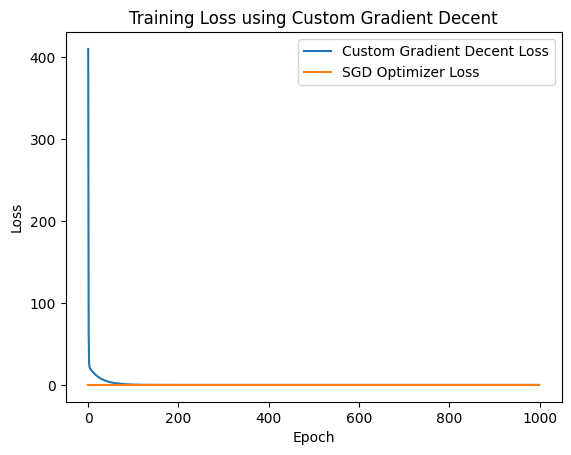

In [898]:
# Plotting
plt.plot(custom_losses, label="Custom Gradient Decent Loss")
plt.plot(losses, label="SGD Optimizer Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss using Custom Gradient Decent")

<!-- @format -->

## 7. Dataset Size and Convergence


<!-- @format -->

**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


<!-- @format -->

**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


In [899]:
np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))

In [900]:
epochs = 10
learning_rate = 0.001

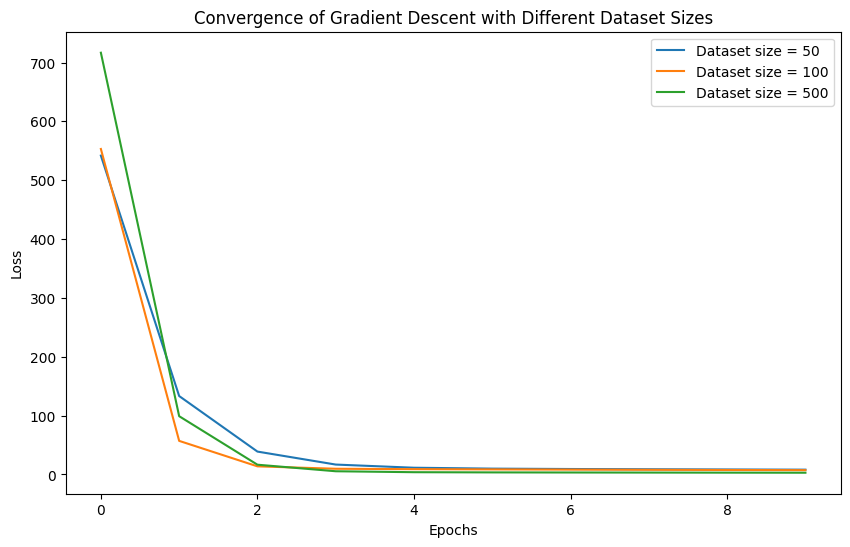

In [901]:
def plot_loss_curves(datasets, sizes):
    plt.figure(figsize=(10, 6))
    for (X, y), size in zip(datasets, sizes):
        X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1).to(device)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)
        
        model = LinearRegression().to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        
        losses = train_with_opt(model, X_tensor, y_tensor, optimizer, epochs)
        
        plt.plot(losses, label=f'Dataset size = {size}')
        
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Convergence of Gradient Descent with Different Dataset Sizes')
    plt.show()

plot_loss_curves(datasets, sizes)

<!-- @format -->

## 8. Effect of Model Complexity on Overfitting


<!-- @format -->

**Dataset**: Use the following code to generate a dataset of 200 samples:


<!-- @format -->

**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


In [908]:
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon

indices = np.argsort(X)
X = X[indices]
y = y[indices]

X_train, X_test, y_tensor, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [903]:
class PolynomialRegression(nn.Module):
    def __init__(self, degree):
        super().__init__()
        self.poly = nn.Linear(degree + 1, 1)

    def forward(self, x):
        return self.poly(x)

def expand_features(x, degree):
    poly_features = [x**i for i in range(degree + 1)]
    return torch.cat(poly_features, dim=1)

def train_model(model, optimizer, loss_fn, X_train, y_train, X_val, y_val, epochs=20):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)
            val_losses.append(val_loss.item())

    return train_losses, val_losses

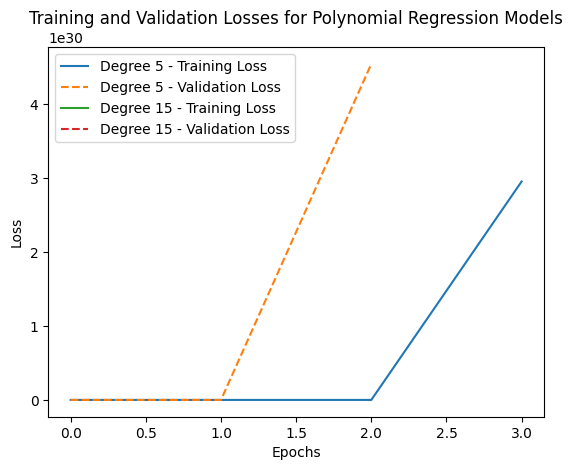

In [909]:

degrees = [5, 15]
train_losses, val_losses = [], []

for degree in degrees:
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1).to(device)
    y_train_tensor = torch.tensor(y_tensor, dtype=torch.float32).view(-1, 1).to(device)
    X_val_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1).to(device)
    y_val_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

    X_train_tensor = expand_features(X_train_tensor, degree)
    X_val_tensor = expand_features(X_val_tensor, degree)

    model = PolynomialRegression(degree).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()
    epochs = 20

    _train_losses, _val_losses = train_model(model, optimizer, loss_fn, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs)
    train_losses.append(_train_losses)
    val_losses.append(_val_losses)

    plt.plot(_train_losses, label=f'Degree {degree} - Training Loss')
    plt.plot(_val_losses, '--', label=f'Degree {degree} - Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses for Polynomial Regression Models')
plt.show()

<!-- @format -->

## 9. Gradient Descent for Non-linear Data


<!-- @format -->

**Dataset**: Use the following code to generate a dataset of 100 samples:


<!-- @format -->

**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.


In [ ]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)

In [906]:
learning_rate = 0.001
epochs = 1000

model = LinearRegression().to(device)
losses = custom_train(model, learning_rate, X_tensor, y_tensor, epochs)

Epoch [100/1000], Loss: 0.4977
Epoch [200/1000], Loss: 0.4407
Epoch [300/1000], Loss: 0.4294
Epoch [400/1000], Loss: 0.4220
Epoch [500/1000], Loss: 0.4170
Epoch [600/1000], Loss: 0.4136
Epoch [700/1000], Loss: 0.4114
Epoch [800/1000], Loss: 0.4099
Epoch [900/1000], Loss: 0.4089
Epoch [1000/1000], Loss: 0.4082


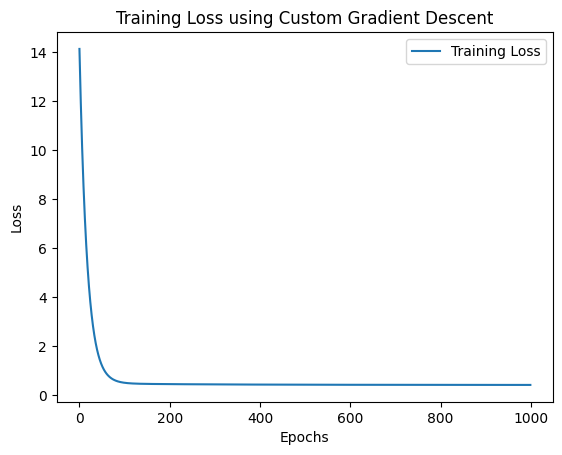

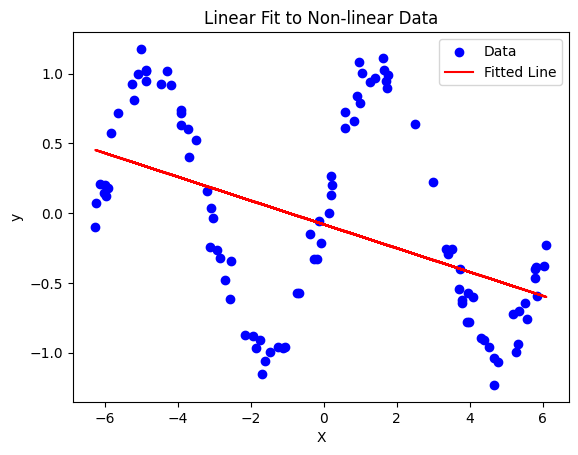

Learned parameters: Weight = -0.08522568643093109, Bias = -0.08111536502838135


In [907]:
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss using Custom Gradient Descent")
plt.show()

model.eval()
with torch.no_grad():
    y_pred = model(X_tensor)

plt.scatter(X, y, label='Data', color='blue')
plt.plot(X, y_pred.cpu().numpy(), label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Fit to Non-linear Data')
plt.show()

print(f"Learned parameters: Weight = {model.linear.weight.item()}, Bias = {model.linear.bias.item()}")